# Load Dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [7]:
#checking null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
# Checking Dublicates
df.duplicated().sum()

418

In [9]:
# Removing dublicates
df=df.drop_duplicates(keep='first')

In [10]:
df.shape

(49582, 2)

# Label Encoding On Sentiment column

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['sentiment']=le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Data Preprocessing

 1. Remove Chatwords
 2. Remove HTML Tags
 3. Remove URL'S
 4. Remove Punctuations
 5. Text Lowercase




### 1. Remove Chatwords

In [13]:

chatwords = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}

print(chatwords)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laughing my a** off', 'LOL': 'L

In [14]:
def chat_conversation(text):
    new_text=[]
    for word in text.split():
        if word.upper() in chatwords:
            new_text.append(chatwords[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)


chat_conversation('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [15]:
df['review']=df['review'].apply(chat_conversation)

### 2. Remove HTML Tags

In [16]:
import re
def remove_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)


In [17]:

text="<h2>Design and Comfort</h2><p>The headphones feature a sleek, modern design with <em>comfortable ear cushions</em> that provide a snug fit. The adjustable headband ensures a perfect fit for all head sizes.</p>"

In [18]:
remove_html(text)

'Design and ComfortThe headphones feature a sleek, modern design with comfortable ear cushions that provide a snug fit. The adjustable headband ensures a perfect fit for all head sizes.'

In [19]:
df['review']=df['review'].apply(remove_html)

### 3. Remove URL'S

In [20]:
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [21]:
text='Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the "https://www.example.com/battery-life" battery life report'

In [22]:
remove_url(text)

'Battery Life One of the standout features is the impressive battery life. The headphones offer up to  30 hours of continuous playback on a single charge, making them ideal for long journeys.For more information on battery performance, read the " battery life report'

In [23]:
df['review']=df['review'].apply(remove_url)

### 4. Remove Punctuations

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuations(text):
    punctuations=string.punctuation
    no_punctuations="".join([char for char in text if char not in punctuations])
    return no_punctuations

In [26]:
text='Hello, how are you?'

In [27]:
remove_punctuations(text)

'Hello how are you'

In [28]:
df['review']=df['review'].apply(remove_punctuations)

### 5. Text LowerCase

In [29]:
df['review']=df['review'].str.lower()

In [30]:
df.review[8]

'encouraged by the positive comments about this film on here i was looking forward to watching this film bad mistake ive seen 950 films and this is truly one of the worst of them  its awful in almost every way editing pacing storyline acting soundtrack the films only song  a lame country tune  is played no less than four times the film looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a film the only thing that prevents me giving this a 1score is harvey keitel  while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only'

In [31]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend te...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the tears in my eyes of...,1


# Feature Extraction

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import   Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)

In [34]:
train_data.shape

(39665, 2)

In [35]:
test_data.shape

(9917, 2)

In [36]:
tokenizer=Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(train_data['review'])

In [37]:
x_train=pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
x_test=pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

In [38]:
x_train

array([[   0,    0,    0, ...,  367,  207,  134],
       [   0,    0,    0, ..., 4244,    2, 2741],
       [  89,    7,   36, ...,  390,   24,  194],
       ...,
       [1622,    4,   86, ...,    8,    3, 3366],
       [   0,    0,    0, ...,  243,  103,  122],
       [   0,    0,    0, ...,    4,    1, 2743]], dtype=int32)

In [39]:
x_test

array([[   0,    0,    0, ...,    3,   39,   39],
       [3326,    4,    3, ...,   37,    9,   27],
       [  21,   66,  129, ...,  482,   40,    1],
       ...,
       [  30,   24,    1, ...,    8,   64, 1040],
       [   0,    0,    0, ...,    1,  310,  312],
       [   0,    0,    0, ...,   82,   13,  646]], dtype=int32)

In [40]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

In [41]:
y_train

7837     0
4814     0
35458    1
3446     0
24478    0
        ..
11304    0
45059    0
38405    0
860      1
15838    1
Name: sentiment, Length: 39665, dtype: int64

In [42]:
y_test

29171    0
43589    1
38712    0
16045    0
5248     1
        ..
2923     1
15292    0
17849    0
38079    0
2691     0
Name: sentiment, Length: 9917, dtype: int64

# LSTM Model Building

In [43]:
model=Sequential()
model.add(Embedding(input_dim=5000,output_dim=128,input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
496/496 [==============================] - 360s 712ms/step - loss: 0.3957 - accuracy: 0.8201 - val_loss: 0.3292 - val_accuracy: 0.8608
Epoch 2/5
496/496 [==============================] - 334s 673ms/step - loss: 0.2695 - accuracy: 0.8917 - val_loss: 0.3054 - val_accuracy: 0.8733
Epoch 3/5
496/496 [==============================] - 330s 665ms/step - loss: 0.3054 - accuracy: 0.8679 - val_loss: 0.4781 - val_accuracy: 0.8271
Epoch 4/5
496/496 [==============================] - 337s 679ms/step - loss: 0.2205 - accuracy: 0.9121 - val_loss: 0.4007 - val_accuracy: 0.8442
Epoch 5/5
496/496 [==============================] - 333s 672ms/step - loss: 0.1781 - accuracy: 0.9307 - val_loss: 0.3305 - val_accuracy: 0.8766


# Evaluation Of The Model

1. Loss
2. Accuracy
3. Recal
4. Precision
5. F1 Score
6. Confusion Metrix

In [58]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

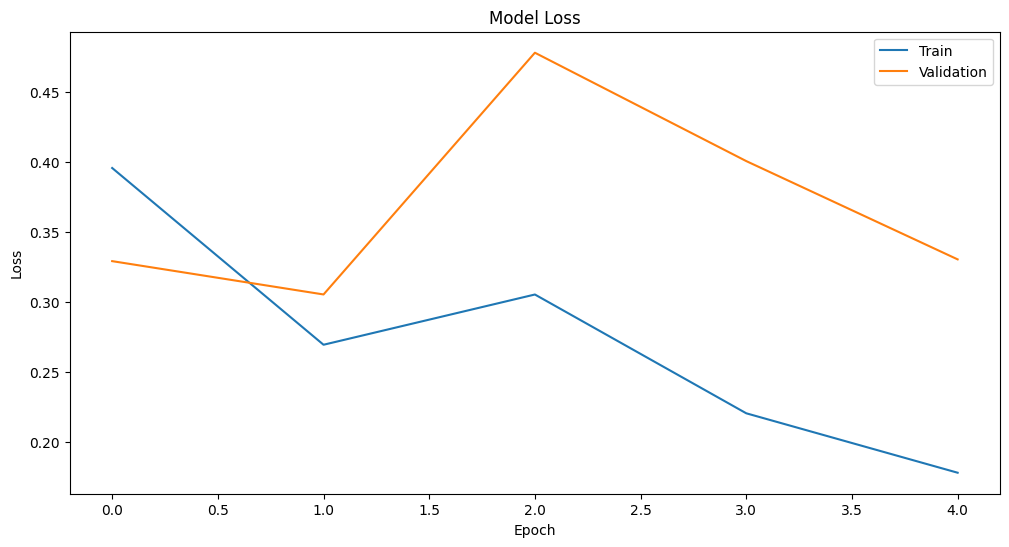

In [49]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

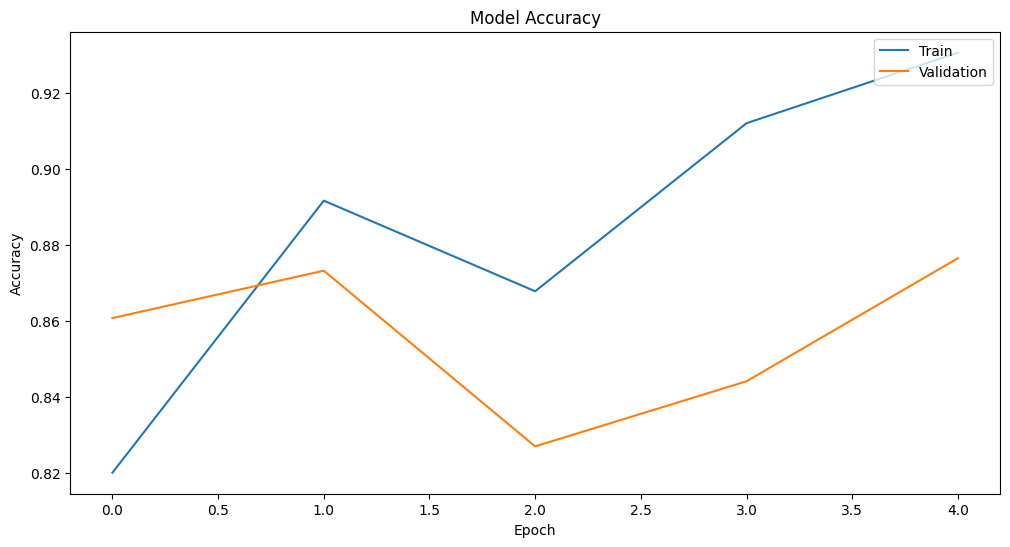

In [50]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [52]:
#Evaluation On Test Data
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss}")
print(f"Test accuracy:{accuracy}")

310/310 [==============================] - 20s 66ms/step - loss: 0.3383 - accuracy: 0.8756
Test Loss:0.33825042843818665
Test accuracy:0.8755671977996826


In [53]:
# Predict on test data
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob).astype(int)

310/310 [==============================] - 20s 65ms/step


In [56]:
# Compute metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [60]:
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

F1 Score: 0.8776764472640762
Recall: 0.8893129770992366
Precision: 0.8663405088062622


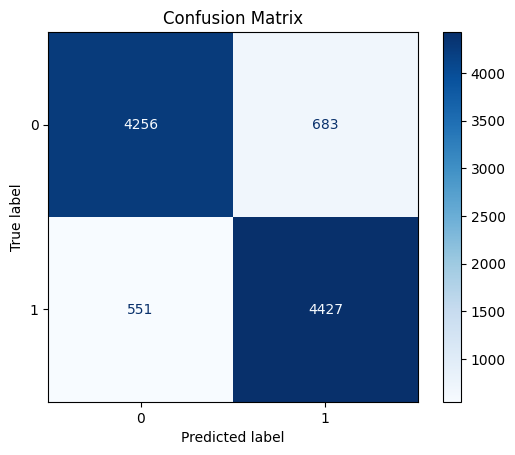

In [59]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()